In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv")
df

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7584,8,7447,129,0.11,98.19,1.70
1,Andhra Pradesh,2030849,14652,2002187,14010,0.72,98.59,0.69
2,Arunachal Pradesh,53807,533,53004,270,0.99,98.51,0.50
3,Assam,595669,5615,584296,5758,0.94,98.09,0.97
4,Bihar,725833,77,716098,9658,0.01,98.66,1.33
5,Chandigarh,65160,32,64311,817,0.05,98.70,1.25
6,Chhattisgarh,1004902,376,990968,13558,0.04,98.61,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10670,5,10661,4,0.05,99.92,0.04
8,Delhi,1438250,377,1412790,25083,0.03,98.23,1.74
9,Goa,174891,702,170972,3217,0.40,97.76,1.84


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [6]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.247105e+05,10061.305556,9.023378e+05,12311.472222,1.175000,97.558611,1.266667
std,1.363114e+06,35512.447915,1.319414e+06,23708.098573,3.103863,2.983397,0.566321
min,7.584000e+03,5.000000,7.447000e+03,4.000000,0.010000,81.330000,0.040000
25%,7.699000e+04,153.500000,7.243350e+04,814.000000,0.050000,97.722500,0.955000
50%,4.718740e+05,556.500000,4.635625e+05,5445.500000,0.460000,98.280000,1.300000
75%,1.007885e+06,5343.500000,9.939285e+05,13671.000000,0.797500,98.652500,1.585000
max,6.500617e+06,209335.000000,6.309021e+06,138169.000000,18.340000,99.920000,2.740000


<AxesSubplot:>

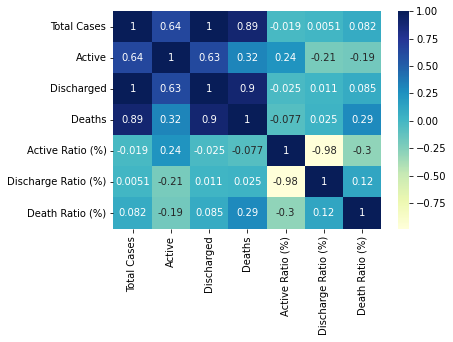

In [7]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

# Observation:
### There is a perfect correlation between Total cases and Discharged cases
### There is a high correlation between Deaths and discharged and also between total cases and deaths

In [8]:
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

<AxesSubplot:xlabel='Total Cases', ylabel='State/UTs'>

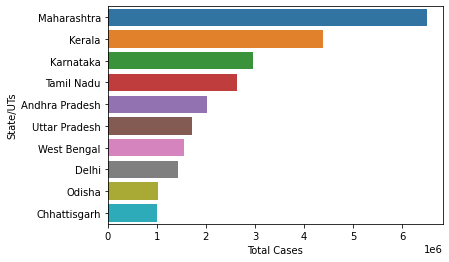

In [9]:
# Top 10 states with highest active cases
top_10_total = df.nlargest(10,'Total Cases')
sns.barplot(x='Total Cases', y='State/UTs',data=top_10_total, orient='h')

In [10]:
# State with highest total cases
top_10_total.iloc[0]

State/UTs              Maharashtra
Total Cases                6500617
Active                       53427
Discharged                 6309021
Deaths                      138169
Active Ratio (%)              0.82
Discharge Ratio (%)          97.05
Death Ratio (%)               2.13
Name: 20, dtype: object

<AxesSubplot:xlabel='Active', ylabel='State/UTs'>

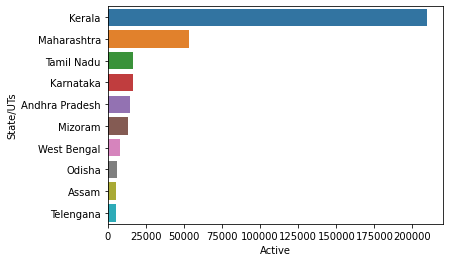

In [11]:
# Top 10 States with highest active cases
top_10_active = df.nlargest(10, 'Active')
sns.barplot(x='Active', y='State/UTs', data=top_10_active, orient='h')

In [12]:
# State with highest Active cases
top_10_active.iloc[0]

State/UTs               Kerala
Total Cases            4390489
Active                  209335
Discharged             4158504
Deaths                   22650
Active Ratio (%)          4.77
Discharge Ratio (%)      94.72
Death Ratio (%)           0.52
Name: 16, dtype: object

<AxesSubplot:xlabel='Deaths', ylabel='State/UTs'>

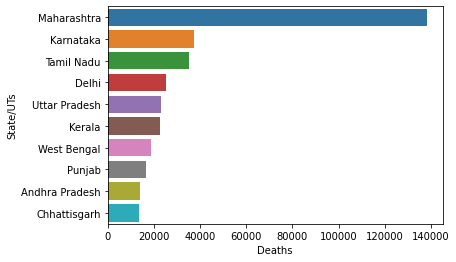

In [13]:
# Top 10 States with highest deaths
top_10_deaths = df.nlargest(10, 'Deaths')
sns.barplot(x='Deaths', y='State/UTs', data=top_10_deaths, orient='h')

In [14]:
# State with highest deaths
top_10_deaths.iloc[0]

State/UTs              Maharashtra
Total Cases                6500617
Active                       53427
Discharged                 6309021
Deaths                      138169
Active Ratio (%)              0.82
Discharge Ratio (%)          97.05
Death Ratio (%)               2.13
Name: 20, dtype: object

<AxesSubplot:xlabel='Discharged', ylabel='State/UTs'>

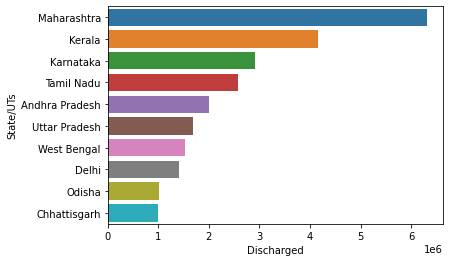

In [15]:
# Top 10 States with highest discharged
top_10_discharged = df.nlargest(10, 'Discharged')
sns.barplot(x='Discharged', y='State/UTs', data=top_10_discharged, orient='h')

In [16]:
# State with highest people discharged
top_10_discharged.iloc[0]

State/UTs              Maharashtra
Total Cases                6500617
Active                       53427
Discharged                 6309021
Deaths                      138169
Active Ratio (%)              0.82
Discharge Ratio (%)          97.05
Death Ratio (%)               2.13
Name: 20, dtype: object

<AxesSubplot:xlabel='Active Ratio (%)', ylabel='State/UTs'>

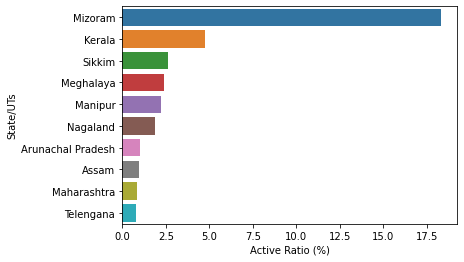

In [17]:
top_10_active_ratio = df.nlargest(10, 'Active Ratio (%)')
sns.barplot(x="Active Ratio (%)", y='State/UTs', data= top_10_active_ratio, orient='h')

In [18]:
# State with highest active ratio
top_10_active_ratio.iloc[0]

State/UTs              Mizoram
Total Cases              72883
Active                   13369
Discharged               59273
Deaths                     241
Active Ratio (%)         18.34
Discharge Ratio (%)      81.33
Death Ratio (%)           0.33
Name: 23, dtype: object

<AxesSubplot:xlabel='Death Ratio (%)', ylabel='State/UTs'>

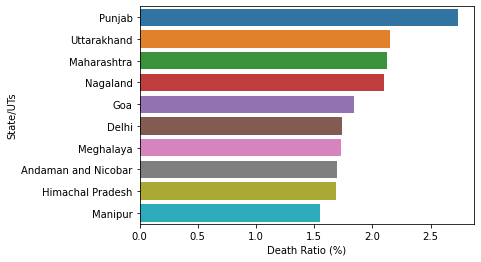

In [19]:
# Top 10 States with highest death ratio
top_10_death_ratio = df.nlargest(10, 'Death Ratio (%)')
sns.barplot(x="Death Ratio (%)", y='State/UTs', data= top_10_death_ratio, orient='h')

In [20]:
# State with highest death ratio
top_10_death_ratio.iloc[0]

State/UTs              Punjab
Total Cases            601072
Active                    309
Discharged             584306
Deaths                  16457
Active Ratio (%)         0.05
Discharge Ratio (%)     97.21
Death Ratio (%)          2.74
Name: 27, dtype: object

<AxesSubplot:xlabel='Discharge Ratio (%)', ylabel='State/UTs'>

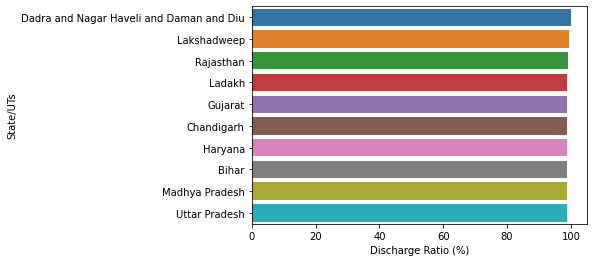

In [21]:
# Top 10 States with highest discharge ratio
top_10_discharge_ratio = df.nlargest(10, 'Discharge Ratio (%)')
sns.barplot(x='Discharge Ratio (%)', y='State/UTs', data=top_10_discharge_ratio, orient='h')

In [22]:
# State with highest discharge ratio
top_10_discharge_ratio.iloc[0]

State/UTs              Dadra and Nagar Haveli and Daman and Diu
Total Cases                                               10670
Active                                                        5
Discharged                                                10661
Deaths                                                        4
Active Ratio (%)                                           0.05
Discharge Ratio (%)                                       99.92
Death Ratio (%)                                            0.04
Name: 7, dtype: object